In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv("dataset/AmazonReview.csv")

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [69]:
##to drop null values(if any)
data.dropna(inplace=True)

In [70]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
 
#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [71]:
# Preprocessing the text data
data["Review"] = data["Review"].str.lower()  # Convert to lowercase
data["Review"] = data["Review"].str.replace('[^\w\s]', '')  # Remove punctuation
data["Review"] = data["Review"].str.replace('\d+', '')  # Remove digits

C:\Users\NAMAN\AppData\Local\Temp\ipykernel_14648\1391706224.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Review"] = data["Review"].str.replace('[^\w\s]', '')  # Remove punctuation
C:\Users\NAMAN\AppData\Local\Temp\ipykernel_14648\1391706224.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Review"] = data["Review"].str.replace('\d+', '')  # Remove digits


In [56]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [57]:
vectorizer = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(data["Review"]).toarray()
print(X[0])
y = data["Sentiment"]

[0. 0. 0. ... 0. 0. 0.]


In [72]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25,random_state=42)

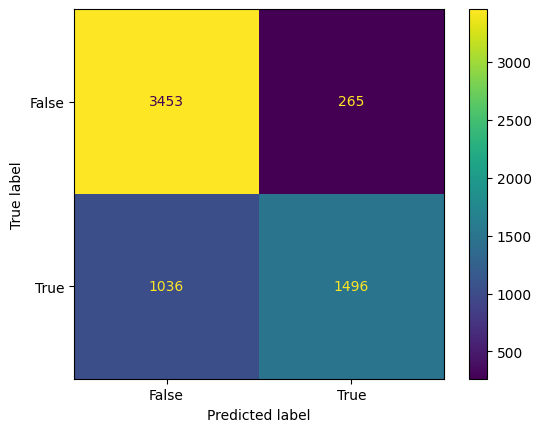

Accuracy: 0.79184


In [73]:
### Using Naive bayes 
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train, y_train)

# Predict sentiment for the test set
y_pred1 = model1.predict(x_test)

# Evaluate the model
acc1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
cm_display1=ConfusionMatrixDisplay(confusion_matrix=conf_matrix1,display_labels=[False,True])
cm_display1.plot()
plt.show()
print(f"Accuracy: {acc1}")
# print(f"Confusion matrix: \n{conf_matrix1}")

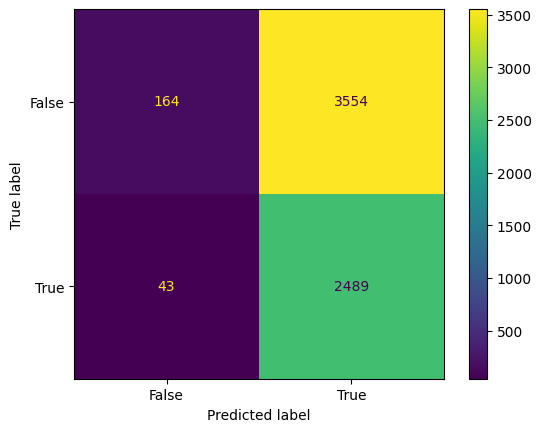

Accuracy: 0.42448


In [74]:
## Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)

# Train the model
model2.fit(x_train, y_train)

# Predict sentiment for the test set
y_pred2 = model2.predict(x_test)

# Evaluate the model
acc2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
cm_display2=ConfusionMatrixDisplay(confusion_matrix=conf_matrix2,display_labels=[False,True])
cm_display2.plot()
plt.show()
print(f"Accuracy: {acc2}")
# print(f"Confusion matrix: \n{conf_matrix2}")

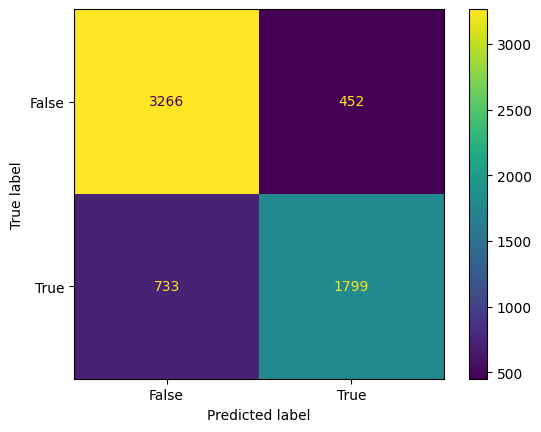

Accuracy: 0.8104


In [75]:
## Using Gradient Boosting Machines(GBMs)
from xgboost import XGBClassifier
model3 = XGBClassifier()

# Train the model
model3.fit(x_train, y_train)

# Predict sentiment for the test set
y_pred3 = model3.predict(x_test)

# Evaluate the model
acc3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
cm_display3=ConfusionMatrixDisplay(confusion_matrix=conf_matrix3,display_labels=[False,True])
cm_display3.plot()
plt.show()
print(f"Accuracy: {acc3}")
# print(f"Confusion matrix: \n{conf_mat3}")

0.8312


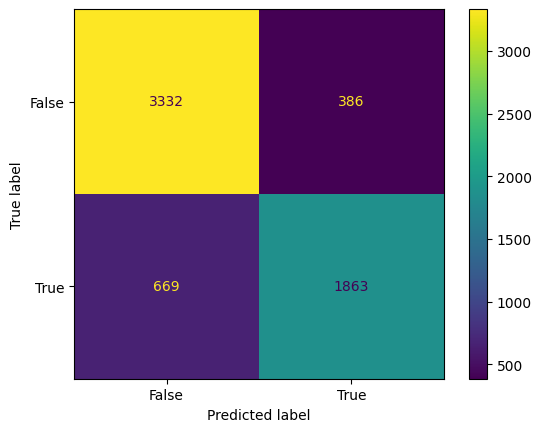

In [76]:
### Using Logistic Regression

from sklearn.linear_model import LogisticRegression

model4=LogisticRegression()
 
#Model fitting
model4.fit(x_train,y_train)
 
#testing the model
pred4=model4.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred4))
conf_matrix4= confusion_matrix(y_test, pred4)
cm_display4=ConfusionMatrixDisplay(confusion_matrix=conf_matrix4,display_labels=[False,True])
cm_display4.plot()
plt.show()
# print(f"Confusion matrix: \n{conf_matrix4}")

In [78]:

def predict_sentiment(review_text):
    review_text = review_text.lower().replace('[^\w\s]', '').replace('\d+', '') # Preprocess the input text
    X_input = vectorizer.transform([review_text]) # Vectorize the input text
    pred = model4.predict(X_input)[0] # Predict the sentiment
    return pred
#testing the model
review_text="excellent product"
sentiment=predict_sentiment(review_text)

print(sentiment) 


1


In [79]:
dump(model4, "model.joblib")
dump(vectorizer, "vectorizer.joblib")

['vectorizer.joblib']